In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
#pip install tensorflow --ignore-installed --user

In [115]:
df=pd.read_csv("Data.csv")
df.head()

,index,Date,US_Dollar,Pound_Sterling,Euro,Japanese_Yen
0,5707,04-01-1999,42.51,70.7814,50.4872,37.4703
1,5706,05-01-1999,42.56,70.4473,50.2412,38.2080
2,5705,06-01-1999,42.51,70.3235,49.9276,37.7229
3,5704,07-01-1999,42.52,70.3087,49.5148,38.0322
4,5703,08-01-1999,42.52,70.0427,49.7265,38.0799


In [116]:
df["Date"] = pd.to_datetime(df["Date"])

In [117]:
df.isnull().sum()

index             0
Date              0
US_Dollar         0
Pound_Sterling    0
Euro              0
Japanese_Yen      0
dtype: int64

In [118]:
df1 = df.dropna()
df1.head()

,index,Date,US_Dollar,Pound_Sterling,Euro,Japanese_Yen
0,5707,1999-04-01,42.51,70.7814,50.4872,37.4703
1,5706,1999-05-01,42.56,70.4473,50.2412,38.2080
2,5705,1999-06-01,42.51,70.3235,49.9276,37.7229
3,5704,1999-07-01,42.52,70.3087,49.5148,38.0322
4,5703,1999-08-01,42.52,70.0427,49.7265,38.0799


In [119]:
df1.isnull().sum()

index             0
Date              0
US_Dollar         0
Pound_Sterling    0
Euro              0
Japanese_Yen      0
dtype: int64

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5707 entries, 0 to 5706
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           5707 non-null   int64         
 1   Date            5707 non-null   datetime64[ns]
 2   US_Dollar       5707 non-null   float64       
 3   Pound_Sterling  5707 non-null   float64       
 4   Euro            5707 non-null   float64       
 5   Japanese_Yen    5707 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 312.1 KB


In [121]:
d=df1
d=d.iloc[::-1]
d.reset_index(inplace=True)
d

,level_0,index,Date,US_Dollar,Pound_Sterling,Euro,Japanese_Yen
0,5706,0,2022-07-29,79.42,96.8986,81.1675,59.7300
1,5705,1,2022-07-28,79.74,97.0642,81.5435,58.9300
2,5704,2,2022-07-27,79.90,96.2633,80.9790,58.3600
3,5703,3,2022-07-26,79.79,96.2182,81.5636,58.3700
4,5702,4,2022-07-25,79.85,95.5769,81.4458,58.5400
...,...,...,...,...,...,...,...
5702,4,5703,1999-08-01,42.52,70.0427,49.7265,38.0799
5703,3,5704,1999-07-01,42.52,70.3087,49.5148,38.0322
5704,2,5705,1999-06-01,42.51,70.3235,49.9276,37.7229
5705,1,5706,1999-05-01,42.56,70.4473,50.2412,38.2080


In [122]:
train = d[:-225]
len(train)
test = d[-225:]
len(test)
train_dates = pd.to_datetime(train['Date'])
test_dates  = pd.to_datetime(test['Date'])

In [194]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['US_Dollar'].values.reshape(-1,1))

In [195]:
scaled_data

array([[0.98624417],
       [0.99410464],
       [0.99803488],
       ...,
       [0.10488823],
       [0.10488823],
       [0.10341439]])

In [196]:
train['US_Dollar'].values.reshape(-1,1)

array([[79.42],
       [79.74],
       [79.9 ],
       ...,
       [43.54],
       [43.54],
       [43.48]])

In [197]:
prediction_days = 225

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [198]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [199]:
y_train.shape

(5257,)

In [200]:
x_train.shape

(5257, 225, 1)

In [201]:
from tensorflow.keras.models import Sequential
model_usd = Sequential()
model_usd.add(LSTM(units =100, activation='relu', input_shape = (x_train.shape[1],1)))
#model_usd.add(Dropout(0.8))
#model_usd.add(LSTM(units =64, activation='relu', return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
#model_usd.add(Dropout(0.8))
#model_usd.add(LSTM(units =64, activation='relu', return_sequences=False, dropout=0.3, recurrent_dropout=0.3))
#model_usd.add(Dropout(0.8))
model_usd.add(Dense(units=1)) # Prediction of the next value

In [202]:
model_usd.compile(optimizer='adam', loss='mean_squared_error')
model_usd.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 100)               40800     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [203]:
#es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history_usd = model_usd.fit(x_train, y_train, epochs = 25, batch_size=32, validation_split=0.1)
history_usd

Epoch 1/25
148/148 [==============================] - 48s 303ms/step - loss: 0.0098 - val_loss: 1.1529e-05
Epoch 2/25
148/148 [==============================] - 40s 268ms/step - loss: 1.4830e-04 - val_loss: 1.1504e-05
Epoch 3/25
148/148 [==============================] - 45s 306ms/step - loss: 1.3671e-04 - val_loss: 1.1250e-05
Epoch 4/25
148/148 [==============================] - 47s 319ms/step - loss: 1.3970e-04 - val_loss: 2.2956e-05
Epoch 5/25
148/148 [==============================] - 39s 261ms/step - loss: 1.3406e-04 - val_loss: 2.1760e-05
Epoch 6/25
148/148 [==============================] - 38s 257ms/step - loss: 1.2037e-04 - val_loss: 1.2500e-05
Epoch 7/25
148/148 [==============================] - 46s 310ms/step - loss: 1.1325e-04 - val_loss: 7.6270e-06
Epoch 8/25
148/148 [==============================] - 51s 348ms/step - loss: 1.0620e-04 - val_loss: 9.1301e-06
Epoch 9/25
148/148 [==============================] - 35s 240ms/step - loss: 9.9332e-05 - val_loss: 1.6756e-05
Epoch

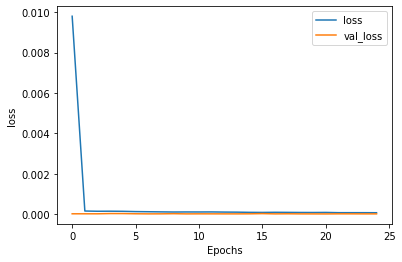

In [204]:
def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
graph_plots(history_usd, "loss")

In [205]:
actual_val_usd = test['US_Dollar'].values
total_val_usd = pd.concat((train['US_Dollar'], test['US_Dollar']),axis=0)

model_inputs_usd = total_val_usd[len(total_val_usd)-len(test)-prediction_days:].values
model_inputs_usd = model_inputs_usd.reshape(-1,1)
model_inputs_usd = scaler.transform(model_inputs_usd)


# Make Predictions on Test Data
x_test_usd = []

for x in range(prediction_days, len(model_inputs_usd)):
    x_test_usd.append(model_inputs_usd[x-prediction_days:x, 0])

x_test_usd = np.array(x_test_usd)
x_test_usd = np.reshape(x_test_usd, (x_test_usd.shape[0], x_test_usd.shape[1], 1))

pred_usd = model_usd.predict(x_test_usd)
pred_usd = scaler.inverse_transform(pred_usd)

8/8 [==============================] - 2s 100ms/step


In [206]:
import sklearn
from sklearn import metrics

In [207]:
pred_usd

array([[43.460308],
       [43.450165],
       [43.435455],
       [43.42852 ],
       [43.412724],
       [43.394352],
       [43.374302],
       [43.361664],
       [43.35342 ],
       [43.348843],
       [43.344273],
       [43.3391  ],
       [43.338585],
       [43.33375 ],
       [43.330086],
       [43.330345],
       [43.33129 ],
       [43.335308],
       [43.333504],
       [43.334385],
       [43.33794 ],
       [43.341045],
       [43.346275],
       [43.356117],
       [43.36155 ],
       [43.35969 ],
       [43.35965 ],
       [43.350723],
       [43.353455],
       [43.348087],
       [43.346092],
       [43.339214],
       [43.33622 ],
       [43.34269 ],
       [43.35763 ],
       [43.354378],
       [43.34185 ],
       [43.352345],
       [43.359764],
       [43.385555],
       [43.371872],
       [43.345795],
       [43.36359 ],
       [43.398228],
       [43.44038 ],
       [43.47846 ],
       [43.50515 ],
       [43.526157],
       [43.54511 ],
       [43.54609 ],


In [208]:
sklearn.metrics.mean_squared_error(test["US_Dollar"], pred_usd)

0.004333664801254047

In [209]:
pred_final_usd=pred_usd.reshape(len(pred_usd),)

In [210]:
pred_final_usd

array([43.460308, 43.450165, 43.435455, 43.42852 , 43.412724, 43.394352,
       43.374302, 43.361664, 43.35342 , 43.348843, 43.344273, 43.3391  ,
       43.338585, 43.33375 , 43.330086, 43.330345, 43.33129 , 43.335308,
       43.333504, 43.334385, 43.33794 , 43.341045, 43.346275, 43.356117,
       43.36155 , 43.35969 , 43.35965 , 43.350723, 43.353455, 43.348087,
       43.346092, 43.339214, 43.33622 , 43.34269 , 43.35763 , 43.354378,
       43.34185 , 43.352345, 43.359764, 43.385555, 43.371872, 43.345795,
       43.36359 , 43.398228, 43.44038 , 43.47846 , 43.50515 , 43.526157,
       43.54511 , 43.54609 , 43.542492, 43.536526, 43.532616, 43.52045 ,
       43.509644, 43.501015, 43.491997, 43.485508, 43.473007, 43.466057,
       43.467297, 43.461758, 43.457664, 43.449368, 43.44833 , 43.451355,
       43.44091 , 43.434433, 43.432293, 43.434185, 43.442245, 43.44984 ,
       43.453465, 43.45865 , 43.470886, 43.45874 , 43.43226 , 43.408325,
       43.388763, 43.38532 , 43.388397, 43.39906 , 

In [211]:
test["US_Dollar"]

5482    43.48
5483    43.46
5484    43.48
5485    43.44
5486    43.42
        ...  
5702    42.52
5703    42.52
5704    42.51
5705    42.56
5706    42.51
Name: US_Dollar, Length: 225, dtype: float64

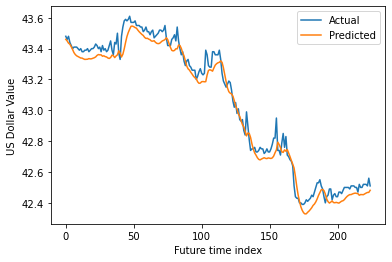

In [212]:
plt.plot(np.array(test["US_Dollar"]))
plt.plot(pred_usd)
plt.xlabel("Future time index")
plt.ylabel("US Dollar Value")
plt.legend(["Actual", "Predicted"])
plt.savefig('plots/lstm1.png',dpi=300,bbox_inces='tight')
plt.show()

In [123]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['Pound_Sterling'].values.reshape(-1,1))

In [124]:
scaled_data

array([[0.7829787 ],
       [0.78691525],
       [0.76787671],
       ...,
       [0.14714517],
       [0.16166001],
       [0.1573859 ]])

In [131]:
prediction_days = 225

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [132]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [133]:
from tensorflow.keras.models import Sequential
model_pound = Sequential()
model_pound.add(LSTM(units =100, activation='relu', input_shape = (x_train.shape[1],1)))
#model_pound.add(Dropout(0.2))
#model_pound.add(LSTM(units =128, activation='relu', return_sequences=True))
#model_pound.add(Dropout(0.2))
#model_pound.add(LSTM(units =128, activation='relu', return_sequences=False))
#model_pound.add(Dropout(0.2))
model_pound.add(Dense(units=1)) # Prediction of the next value

In [134]:
model_pound.compile(optimizer='adam', loss='mean_squared_error')
model_pound.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100)               40800     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [135]:
history_pound = model_pound.fit(x_train, y_train, epochs = 25, batch_size=32, validation_split=0.1)
history_pound

Epoch 1/25
148/148 [==============================] - 24s 153ms/step - loss: 0.0146 - val_loss: 0.0014
Epoch 2/25
148/148 [==============================] - 26s 173ms/step - loss: 7.1685e-04 - val_loss: 3.2732e-04
Epoch 3/25
148/148 [==============================] - 31s 207ms/step - loss: 6.1128e-04 - val_loss: 2.6456e-04
Epoch 4/25
148/148 [==============================] - 24s 159ms/step - loss: 5.4142e-04 - val_loss: 2.3404e-04
Epoch 5/25
148/148 [==============================] - 29s 194ms/step - loss: 4.8084e-04 - val_loss: 2.2465e-04
Epoch 6/25
148/148 [==============================] - 28s 191ms/step - loss: 3.9818e-04 - val_loss: 2.1822e-04
Epoch 7/25
148/148 [==============================] - 25s 171ms/step - loss: 3.6497e-04 - val_loss: 1.9171e-04
Epoch 8/25
148/148 [==============================] - 26s 173ms/step - loss: 3.2954e-04 - val_loss: 1.5345e-04
Epoch 9/25
148/148 [==============================] - 25s 171ms/step - loss: 3.3596e-04 - val_loss: 1.4560e-04
Epoch 10/

In [136]:
history_pound.history['val_loss']

[0.0013585732085630298,
 0.00032732015824876726,
 0.00026456351042725146,
 0.0002340360515518114,
 0.0002246519725304097,
 0.00021822033158969134,
 0.0001917101035360247,
 0.00015345282736234367,
 0.00014559872215613723,
 0.00013804499758407474,
 0.00016412964032497257,
 0.00012844541925005615,
 0.0001316521520493552,
 0.0001190299226436764,
 0.00011747748794732615,
 0.000113319416414015,
 0.00014824524987488985,
 0.00010861279588425532,
 0.00013696475070901215,
 0.00010713141091400757,
 0.00010334206308471039,
 0.00010789950465550646,
 0.00010347512579755858,
 9.854062955128029e-05,
 0.00010626627044985071]

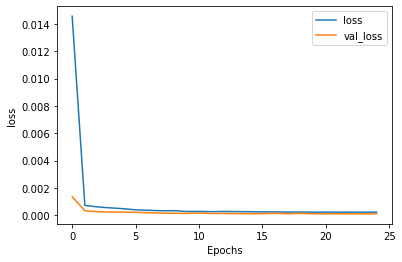

In [137]:
def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
graph_plots(history_pound, "loss")

In [138]:
actual_val_pound = test['Pound_Sterling'].values
total_val_pound = pd.concat((train['Pound_Sterling'], test['Pound_Sterling']),axis=0)

model_inputs_pound = total_val_pound[len(total_val_pound)-len(test)-prediction_days:].values
model_inputs_pound = model_inputs_pound.reshape(-1,1)
model_inputs_pound = scaler.transform(model_inputs_pound)


# Make Predictions on Test Data
x_test_pound = []

for x in range(prediction_days, len(model_inputs_pound)):
    x_test_pound.append(model_inputs_pound[x-prediction_days:x, 0])

x_test_pound = np.array(x_test_pound)
x_test_pound = np.reshape(x_test_pound, (x_test_pound.shape[0], x_test_pound.shape[1], 1))

pred_pound = model_pound.predict(x_test_pound)
pred_pound = scaler.inverse_transform(pred_pound)

8/8 [==============================] - 2s 141ms/step


In [139]:
model_pound.predict(x_test_pound).shape

8/8 [==============================] - 1s 130ms/step


(225, 1)

In [140]:
sklearn.metrics.mean_squared_error(test["Pound_Sterling"], pred_pound)

0.13919330365386698

In [141]:
pred_final_pound=pred_pound.reshape(len(pred_pound),)

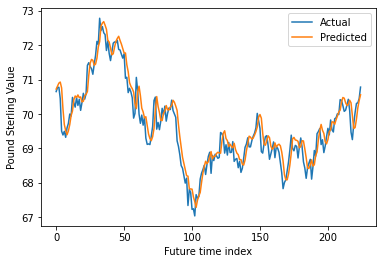

In [191]:
plt.plot(np.array(test["Pound_Sterling"]))
plt.plot(pred_pound)
plt.xlabel("Future time index")
plt.ylabel("Pound Sterling Value")
plt.legend(["Actual", "Predicted"])
plt.savefig('plots/lstm2.png',dpi=300,bbox_inces='tight')

plt.show()

In [143]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['Euro'].values.reshape(-1,1))

In [144]:
prediction_days = 225

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [145]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [146]:
from tensorflow.keras.models import Sequential
model_euro = Sequential()
model_euro.add(LSTM(units =100, activation='relu', input_shape = (x_train.shape[1],1), return_sequences=False))
#model_euro.add(Dropout(0.2))
#model_euro.add(LSTM(units =128, activation='relu', return_sequences=True))
#model_euro.add(Dropout(0.2))
#model_euro.add(LSTM(units =128, activation='relu', return_sequences=False))
#model_euro.add(Dropout(0.2))
model_euro.add(Dense(units=1)) # Prediction of the next value

In [147]:
model_euro.compile(optimizer='adam', loss='mean_squared_error')
model_euro.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100)               40800     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [148]:
history_euro = model_euro.fit(x_train, y_train, epochs = 25, batch_size=32, validation_split=0.1)
history_euro

Epoch 1/25
148/148 [==============================] - 41s 242ms/step - loss: 180852752.0000 - val_loss: 0.0025
Epoch 2/25
148/148 [==============================] - 36s 241ms/step - loss: 0.0323 - val_loss: 2.4191e-04
Epoch 3/25
148/148 [==============================] - 28s 190ms/step - loss: 0.0110 - val_loss: 2.0070e-04
Epoch 4/25
148/148 [==============================] - 29s 199ms/step - loss: 0.0033 - val_loss: 1.6242e-04
Epoch 5/25
148/148 [==============================] - 34s 229ms/step - loss: 0.0010 - val_loss: 1.5427e-04
Epoch 6/25
148/148 [==============================] - 32s 218ms/step - loss: 4.2050e-04 - val_loss: 1.4338e-04
Epoch 7/25
148/148 [==============================] - 32s 214ms/step - loss: 2.6723e-04 - val_loss: 1.5551e-04
Epoch 8/25
148/148 [==============================] - 33s 221ms/step - loss: 2.1674e-04 - val_loss: 1.3371e-04
Epoch 9/25
148/148 [==============================] - 30s 200ms/step - loss: 1.9517e-04 - val_loss: 1.4000e-04
Epoch 10/25
148/1

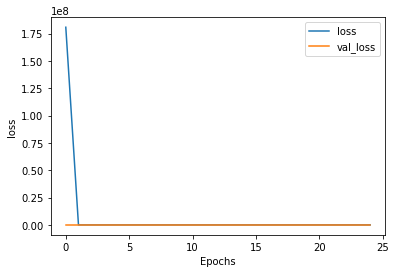

In [149]:
def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
graph_plots(history_euro, "loss")

In [150]:
actual_val_euro = test['Euro'].values
total_val_euro = pd.concat((train['Euro'], test['Euro']),axis=0)

model_inputs_euro = total_val_euro[len(total_val_euro)-len(test)-prediction_days:].values
model_inputs_euro = model_inputs_euro.reshape(-1,1)
model_inputs_euro = scaler.transform(model_inputs_euro)


# Make Predictions on Test Data
x_test_euro = []

for x in range(prediction_days, len(model_inputs_euro)):
    x_test_euro.append(model_inputs_euro[x-prediction_days:x, 0])

x_test_euro = np.array(x_test_euro)
x_test_euro = np.reshape(x_test_euro, (x_test_euro.shape[0], x_test_euro.shape[1], 1))

pred_euro = model_euro.predict(x_test_euro)
pred_euro = scaler.inverse_transform(pred_euro)

8/8 [==============================] - 2s 138ms/step


In [151]:
sklearn.metrics.mean_squared_error(test["Euro"], pred_euro)

0.2698123930375116

In [152]:
pred_final_euro=pred_euro.reshape(len(pred_euro),)

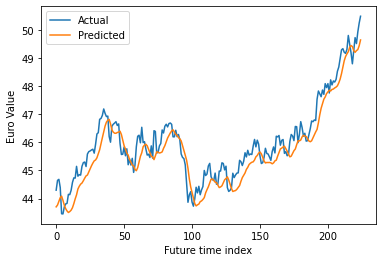

In [190]:
plt.plot(np.array(test["Euro"]))
plt.plot(pred_euro)
plt.xlabel("Future time index")
plt.ylabel("Euro Value")
plt.legend(["Actual", "Predicted"])
plt.savefig('plots/lstm3.png',dpi=300,bbox_inces='tight')

plt.show()

In [154]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['Japanese_Yen'].values.reshape(-1,1))

In [155]:
prediction_days = 225

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [156]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [157]:
from tensorflow.keras.models import Sequential
model_yen = Sequential()
model_yen.add(LSTM(units =100, activation='relu', input_shape = (x_train.shape[1],1), return_sequences=False))
#model_yen.add(Dropout(0.2))
#model_yen.add(LSTM(units =128, activation='relu', return_sequences=True))
#model_yen.add(Dropout(0.2))
#model_yen.add(LSTM(units =128, activation='relu', return_sequences=False))
#model_yen.add(Dropout(0.2))
model_yen.add(Dense(units=1)) # Prediction of the next value

In [158]:
model_yen.compile(optimizer='adam', loss='mean_squared_error')
model_yen.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100)               40800     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [159]:
history_yen = model_yen.fit(x_train, y_train, epochs = 25, batch_size=32, validation_split=0.1)
history_yen

Epoch 1/25
148/148 [==============================] - 37s 227ms/step - loss: 0.0465 - val_loss: 1.5753e-04
Epoch 2/25
148/148 [==============================] - 35s 239ms/step - loss: 0.0018 - val_loss: 1.2649e-04
Epoch 3/25
148/148 [==============================] - 32s 214ms/step - loss: 4.1709e-04 - val_loss: 1.1934e-04
Epoch 4/25
148/148 [==============================] - 36s 241ms/step - loss: 3.4120e-04 - val_loss: 1.0632e-04
Epoch 5/25
148/148 [==============================] - 30s 204ms/step - loss: 3.0626e-04 - val_loss: 1.0560e-04
Epoch 6/25
148/148 [==============================] - 30s 206ms/step - loss: 2.7373e-04 - val_loss: 8.7039e-05
Epoch 7/25
148/148 [==============================] - 34s 229ms/step - loss: 2.3960e-04 - val_loss: 8.5228e-05
Epoch 8/25
148/148 [==============================] - 30s 203ms/step - loss: 2.1899e-04 - val_loss: 7.7751e-05
Epoch 9/25
148/148 [==============================] - 31s 208ms/step - loss: 2.0070e-04 - val_loss: 7.7267e-05
Epoch 10/

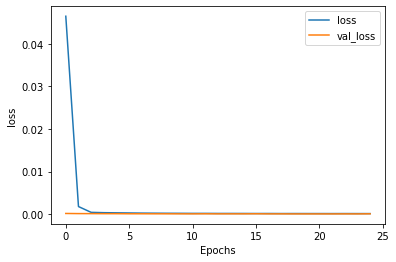

In [160]:
def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
graph_plots(history_yen, "loss")

In [161]:
actual_val_yen = test['Japanese_Yen'].values
total_val_yen = pd.concat((train['Japanese_Yen'], test['Japanese_Yen']),axis=0)

model_inputs_yen = total_val_yen[len(total_val_yen)-len(test)-prediction_days:].values
model_inputs_yen = model_inputs_yen.reshape(-1,1)
model_inputs_yen = scaler.transform(model_inputs_yen)


# Make Predictions on Test Data
x_test_yen = []

for x in range(prediction_days, len(model_inputs_yen)):
    x_test_yen.append(model_inputs_yen[x-prediction_days:x, 0])

x_test_yen = np.array(x_test_yen)
x_test_yen = np.reshape(x_test_yen, (x_test_yen.shape[0], x_test_yen.shape[1], 1))

pred_yen = model_yen.predict(x_test_yen)
pred_yen = scaler.inverse_transform(pred_yen)

8/8 [==============================] - 1s 86ms/step


In [162]:
sklearn.metrics.mean_squared_error(test["Japanese_Yen"], pred_yen)

0.2011477948483636

In [163]:
pred_final_yen=pred_yen.reshape(len(pred_yen),)

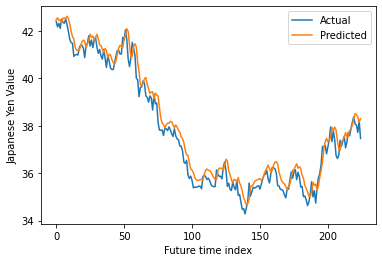

In [213]:
plt.plot(np.array(test["Japanese_Yen"]))
plt.plot(pred_yen)
plt.xlabel("Future time index")
plt.ylabel("Japanese Yen Value")
plt.legend(["Actual", "Predicted"])
plt.savefig('plots/lstm4.png',dpi=300,bbox_4inces='tight')

plt.show()

In [165]:
test

,level_0,index,Date,US_Dollar,Pound_Sterling,Euro,Japanese_Yen
5482,224,5483,1999-10-12,43.48,70.6514,44.2968,42.4112
5483,223,5484,1999-09-12,43.46,70.7714,44.6449,42.1758
5484,222,5485,1999-08-12,43.48,70.7764,44.6828,42.3266
5485,221,5486,1999-07-12,43.44,70.4473,44.3912,42.1141
5486,220,5487,1999-06-12,43.42,69.5024,43.4575,42.5026
...,...,...,...,...,...,...,...
5702,4,5703,1999-08-01,42.52,70.0427,49.7265,38.0799
5703,3,5704,1999-07-01,42.52,70.3087,49.5148,38.0322
5704,2,5705,1999-06-01,42.51,70.3235,49.9276,37.7229
5705,1,5706,1999-05-01,42.56,70.4473,50.2412,38.2080


In [166]:
len(scaled_data)

5482

In [167]:
x_test_usd.shape

(225, 225, 1)

In [168]:
len(x_test_usd)

225

In [169]:
len(pred_usd)

225

In [170]:
x_test_usd[0][0]

array([0.90649973])

In [171]:
test.shape

(225, 7)

In [172]:
len(total_val_yen)

5707

In [173]:
model_inputs_yen.shape

(450, 1)

In [174]:
x_test_yen.shape

(225, 225, 1)

In [175]:
train.shape

(5482, 7)

In [176]:
x_test_euro.shape

(225, 225, 1)

In [177]:
a=d["Japanese_Yen"][-225:]
a

5482    42.4112
5483    42.1758
5484    42.3266
5485    42.1141
5486    42.5026
         ...   
5702    38.0799
5703    38.0322
5704    37.7229
5705    38.2080
5706    37.4703
Name: Japanese_Yen, Length: 225, dtype: float64

In [178]:
a=a.values.reshape(-1,1)
a=scaler.transform(a)
x=[]
x.append(a[0:225, 0])
x = np.array(x)


In [179]:
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [180]:
x.shape

(1, 225, 1)

In [181]:
x

array([[[0.24654324],
        [0.24057317],
        [0.24439767],
        [0.23900837],
        [0.24886127],
        [0.24543495],
        [0.24447882],
        [0.24918083],
        [0.24293178],
        [0.23583819],
        [0.2272635 ],
        [0.22381689],
        [0.22308395],
        [0.20910474],
        [0.21042354],
        [0.21123256],
        [0.21050723],
        [0.21797616],
        [0.22122749],
        [0.22080649],
        [0.21795841],
        [0.20774537],
        [0.22033223],
        [0.22318793],
        [0.23107025],
        [0.22009891],
        [0.22660411],
        [0.21845042],
        [0.22711134],
        [0.22923409],
        [0.2189754 ],
        [0.21226985],
        [0.21645194],
        [0.20928988],
        [0.20613746],
        [0.21650774],
        [0.20732184],
        [0.19721532],
        [0.20970327],
        [0.20396906],
        [0.19646716],
        [0.19495308],
        [0.19503424],
        [0.20171189],
        [0.20931524],
        [0

In [182]:
x_test_yen

array([[[0.27263505],
        [0.27517119],
        [0.27593203],
        ...,
        [0.23680954],
        [0.24233578],
        [0.246386  ]],

       [[0.27517119],
        [0.27593203],
        [0.27314228],
        ...,
        [0.24233578],
        [0.246386  ],
        [0.24654324]],

       [[0.27593203],
        [0.27314228],
        [0.27364951],
        ...,
        [0.246386  ],
        [0.24654324],
        [0.24057317]],

       ...,

       [[0.23680954],
        [0.24233578],
        [0.246386  ],
        ...,
        [0.14440781],
        [0.13669541],
        [0.13548567]],

       [[0.24233578],
        [0.246386  ],
        [0.24654324],
        ...,
        [0.13669541],
        [0.13548567],
        [0.12764139]],

       [[0.246386  ],
        [0.24654324],
        [0.24057317],
        ...,
        [0.13548567],
        [0.12764139],
        [0.1399442 ]]])

In [183]:
scaler.inverse_transform(model_yen.predict(x))

1/1 [==============================] - 0s 71ms/step


array([[37.986298]], dtype=float32)

In [184]:
pred_yen

array([[42.47933 ],
       [42.55859 ],
       [42.44927 ],
       [42.475193],
       [42.36641 ],
       [42.541428],
       [42.557568],
       [42.53258 ],
       [42.62695 ],
       [42.527702],
       [42.302925],
       [41.99245 ],
       [41.771774],
       [41.672276],
       [41.321754],
       [41.194294],
       [41.185043],
       [41.187027],
       [41.374382],
       [41.55094 ],
       [41.619595],
       [41.57176 ],
       [41.29738 ],
       [41.447712],
       [41.60873 ],
       [41.868042],
       [41.732323],
       [41.790375],
       [41.631382],
       [41.744522],
       [41.86097 ],
       [41.675774],
       [41.415142],
       [41.388927],
       [41.230778],
       [41.086166],
       [41.270374],
       [41.169315],
       [40.877014],
       [41.023884],
       [40.990124],
       [40.796116],
       [40.664906],
       [40.614704],
       [40.757996],
       [41.016994],
       [41.281025],
       [41.40062 ],
       [41.34854 ],
       [41.299576],
